Install required packages

In [1]:
# Provides tools for checking phylogeny tree against online ground truth
# !pip install opentree

# provides tools for monophyly and phylogeny
# !pip install biopython
from Bio import Phylo

# provides tools for monophyly and phylogeny
# ! pip install ete3
from ete3 import Tree

# used to render the tree beautifully
!pip install pyqt5
# set flag for rendering
import os
os.environ['QT_QPA_PLATFORM']='offscreen'


Given a metadata spreadsheet, get the tree of that spreadsheet

Included taxonomy:  ['Gambusia affinis', 'Notropis stramineus', 'Lepomis cyanellus', 'Noturus gyrinus', 'Notropis atherinoides', 'Esox americanus', 'Lepomis macrochirus', 'Phenacobius mirabilis', 'Notropis buchanani', 'Lepomis humilis', 'Cyprinus carpio', 'Notropis boops', 'Morone chrysops', 'Lepomis gulosus', 'Notropis buccatus', 'Lepomis megalotis', 'Lepomis auritus', 'Notropis blennius', 'Notropis hudsonius', 'Noturus exilis', 'Notropis nubilus', 'Notropis dorsalis', 'Noturus flavus', 'Notropis volucellus', 'Lepomis microlophus', 'Notropis percobromus', 'Carassius auratus', 'Notropis wickliffi', 'Notropis telescopus', 'Morone mississippiensis', 'Lepisosteus platostomus', 'Noturus nocturnus', 'Lepomis gibbosus', 'Noturus miurus', 'Lepisosteus osseus', 'Notropis leuciodus', 'Notropis texanus', 'Alosa chrysochloris'] 38
Gambusia affinis 	 -> 	 Gambusia affinis
Notropis stramineus 	 -> 	 Notropis stramineus
Lepomis cyanellus 	 -> 	 Lepomis cyanellus
Noturus gyrinus 	 -> 	 Noturus gyrinu

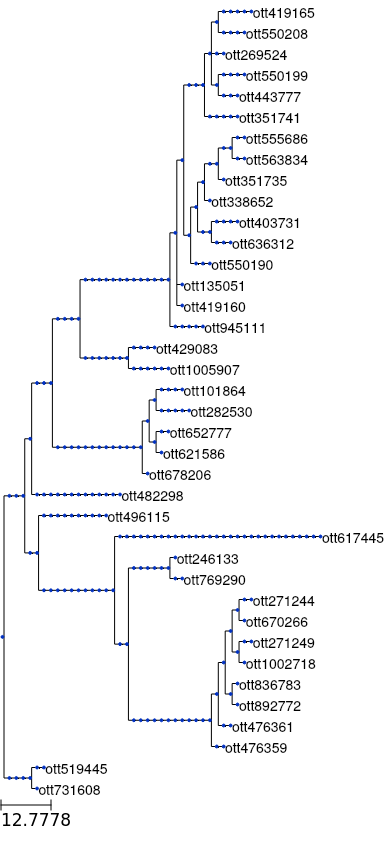

In [2]:
# Look at research in metric learning using deep learning
#Adding triplet losses (with an anchor)

from opentree import OT
import pandas as pd

import pprint
pp = pprint.PrettyPrinter(indent=4)

# prefix_path = "/raid/elhamod/Fish/Curated4/Medium"
prefix_path = "/raid/elhamod/Fish/Curated4/Easy_30"
metadataFile = "cleaned_metadata.csv"
treefile = "cleaned_metadata.tre"

metadataFile = os.path.join(prefix_path, metadataFile)
treefile = os.path.join(prefix_path, treefile)

# Get the taxonomy
df = pd.read_csv(metadataFile, sep="\t") # , usecols=['scientificName']
df_nodupes = df['scientificName'].drop_duplicates() # Will probably need more processing to deal with small letter...etc
node_ids = df_nodupes.tolist()
print('Included taxonomy: ', node_ids, len(node_ids))

# df = pd.read_csv(metadataFile, sep="\t")

# get the response tree
resp = OT.tnrs_match(node_ids, do_approximate_matching=True)
# pp.pprint(resp.response_dict)
matches = resp.response_dict['results']
unmatched_names = resp.response_dict['unmatched_names']

# Get the corresponding ott_ids
df2 = pd.DataFrame(columns=['in csv', 'in response', 'Same?'])
ott_ids = set()
ott_id_dict={}
assert len(unmatched_names)==0 # everything is matched!
for match_array in matches:
    match_array_matches = match_array['matches']
    assert len(match_array_matches)==1, match_array['name'] + " has too many matches" + str(list(map(lambda x: x['matched_name'], match_array_matches)))  # we have one unambiguous match!
    first_match = match_array_matches[0]
    ott_id = first_match['taxon']['ott_id']
    ott_ids.add(ott_id)
    #some original and matched names are not exactly the same. Not a bug
    df2 = df2.append({'in csv':match_array['name'], 'in response': first_match['matched_name'], 'Same?': match_array['name'] == first_match['matched_name']}, ignore_index=True)
    print(match_array['name'], '\t -> \t', first_match['matched_name']) 
    ott_id_dict[match_array['name']] = ott_id
ott_ids = list(ott_ids)
print(df2[df2['Same?']== False])
# print(ott_ids, len(ott_ids))
pp.pprint(ott_id_dict)

# add ott_id to metadata csv file
df['ott_id'] = df.apply(lambda row: ott_id_dict[row['scientificName']], axis=1)
# print(df)

# save and print the tree

#Get the synthetic tree from OpenTree
output = OT.synth_induced_tree(ott_ids=ott_ids, ignore_unknown_ids=False, label_format='id') # name_and_id ott_ids=list(ott_ids),
print(output.tree)
output.tree.write(path = treefile, schema = "newick")
# output.tree.print_plot(width=100)
t = Tree(treefile, format=8)
D = t.search_nodes(name="mrcaott47023ott496121")[0]
D.name = "ott496115"
t.write(format=8, outfile=treefile)
t.render('%%inline')


In [3]:
# matched name -> ott -> save in csv
# load csv -> look at tree ->get distance

species1 = 'Notropis blennius'
species2 = 'Notropis texanus'

ott_id1 = 'ott' + str(ott_id_dict[species1])
ott_id2 = 'ott' + str(ott_id_dict[species2])

print('distance between', species1, 'and', species2, 'is', t.get_distance(ott_id1, ott_id2))




distance between Notropis blennius and Notropis texanus is 9.0


In [4]:
# pp.pprint(resp.response_dict)

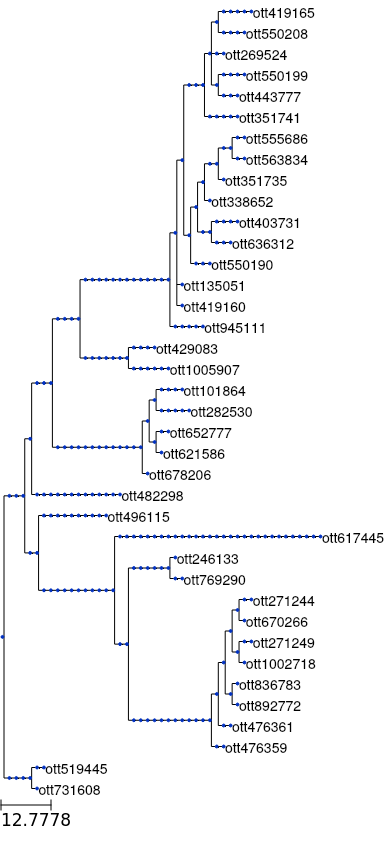

In [5]:
t = Tree(os.path.join(prefix_path, treefile), format=1)
t.render('%%inline')

In [6]:
print(t)


                                                                                                /- /- /- /- /-ott419165
                                                                                             /-|
                                                                                            |   \- /- /- /-ott550208
                                                                                            |
                                                                                          /-|-- /-ott269524
                                                                                         |  |
                                                                                         |  |   /- /- /- /-ott550199
                                                                                 /- /- /-|   \-|
                                                                                |        |      \- /- /-ott443777
                                         

In [7]:
josef_tree_path="/home/elhamod/projects/HGNN/code/HGNN/HGNN/Josephscript/Output/datelife.phy"
ttt = Tree(josef_tree_path, format=1)
ttt.render('%%inline')
# For all nodes, replace name woth ottid

NewickError: Unexisting tree file or Malformed newick tree structure.
You may want to check other newick loading flags like 'format' or 'quoted_node_names'.